# Datahåndteringsprosjekt
Laget av Elias, Aksel og Jakob

Vårt første modelleringsprosjekt er et prosjekt der du skal samle inn et datasett og gjøre statistisk analyse og regresjonsanalyse med disse dataene. Oppgaven går ut på følgende:

1. Samle inn data. Du bør måle minst 6 variabler og samle inn minst 25 målepunkter for hver av de fire variablene. Du kan bruke sensorer, spørreundersøkelser eller tilsvarende. Lagre dataene i en .txt-fil, .csv-fil eller .xlsx-fil (Excel). Hvis du finner et veldig godt datasett på internett som du heller ønsker å bruke, spør læreren om dere kan bruke det isteden.

2. Les dataene i Python og lag relevante visualiseringer som beskriver hva datasettet forteller oss.

3. Beregn relevante mål på sentraltendens og spredning. Presenter resultatene i en oversiktlig tabell. Forklar hva disse målene forteller om dataene dine. Lag gjerne visualiseringer som beskriver spredningen.

4. Regn ut korrelasjoner i datasettet og lag et korrelasjonsplott. Diskuter eventuelle korrelasjoner.

5. Gjør en lineær regresjon av to variabler der en lineær modell kan beskrive sammenhengen mellom variablene. Diskuter modellen.

Prosjektet leveres som fullstendig, sammensatt rapport (lever en .ipynb-fil og .pdf av notebooken). Husk å skrive navnet på alle i gruppa på rapporten. Alle på gruppa skal levere den samme fila på Teams.

## Resources
### Oppgave 1: Samle data
Data hentet fra Metrologist Institutt via frost API

In [40]:
import Reqs
Reqs.downloadReqs() #installerer alle uvanlige pakker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Api  #program vi har laget for å samle 
import DataHandler

reftime = "2013-04-01/2020-12-02"

In [41]:
df = Api.getData(reftime=reftime, n_lines=2)    #Henter data
df = DataHandler.fixTable(df)

Found dataframe.csv, retrieved 12/13/22 18:08
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


## Prosjektet

Found dataframe.csv, retrieved 12/13/22 18:19
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


<AxesSubplot: ylabel='mean(air_temperature P1D)'>

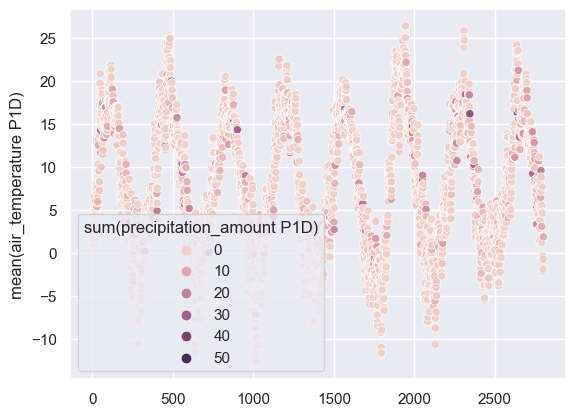

In [42]:
df = Api.getData(reftime=reftime, n_lines=1)
df = DataHandler.fixTable(df)
sns.scatterplot(x= df.index, y=df["mean(air_temperature P1D)"], data=df, hue=df["sum(precipitation_amount P1D)"])

Found dataframe.csv, retrieved 12/13/22 18:19
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved
Found dataframe.csv, retrieved 12/13/22 18:19
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


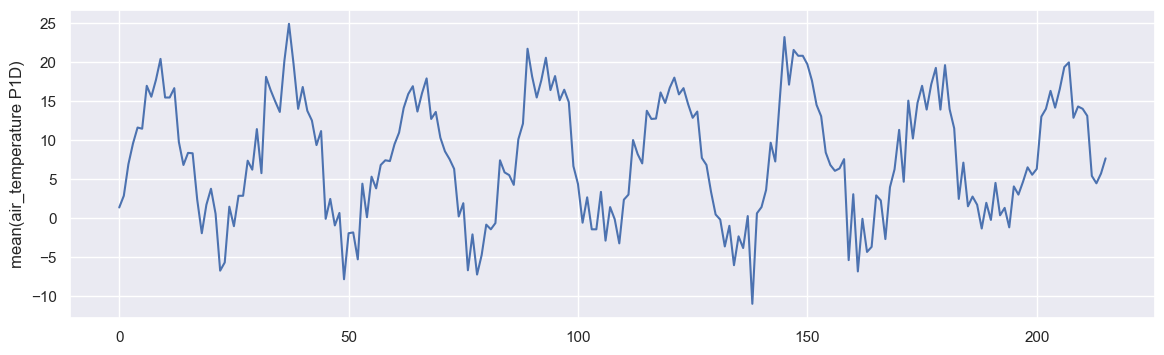

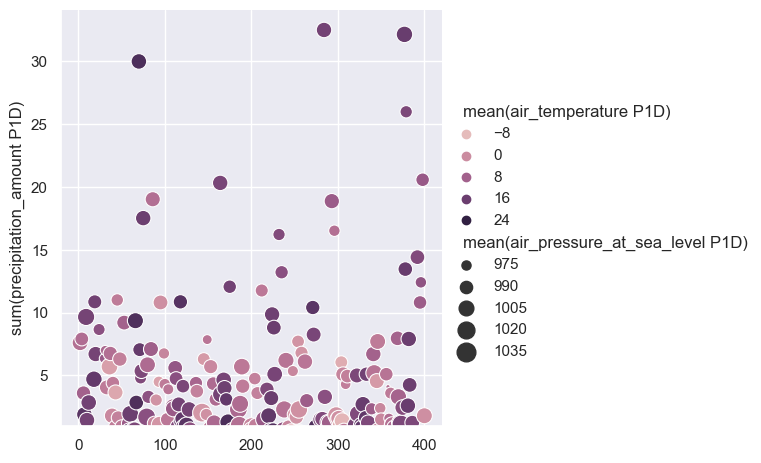

In [43]:
df = Api.getData(reftime=reftime, n_lines=13)
df = DataHandler.fixTable(df)
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
plt.figure(figsize=(14, 4))
sns.lineplot(x=df.index, y=df["mean(air_temperature P1D)"],
             data=df)

df = Api.getData(reftime=reftime, n_lines=7)
df = DataHandler.fixTable(df)

temp = sns.relplot(
data=df,
x=df.index, y=df["sum(precipitation_amount P1D)"],
hue=df["mean(air_temperature P1D)"], size=df["mean(air_pressure_at_sea_level P1D)"], 
sizes=(10, 200),
).set(ylim=(1, None))

### Sentraltendens og spredning

In [45]:
mean = []
median = []
std = []
elements = []

for items in df: 
    try:
        print(items)
        mean.append(np.mean(df[items]))
        median.append(np.nanmedian(df[items]))
        std.append(np.std(df[items]))
        elements.append(items)
    except: 
        next

print(mean)
print(median)
print(std)
print(elements)
liste = [["Data","Gjennomsnitt","Median", "Standaravikk"]]
for i in range(len(elements)):
    if i == 8: break
    a = []
    a.append(elements[i])
    a.append(str(mean[i]))
    a.append(str(median[i]))
    a.append(str(std[i]))
    liste.append(a)
import TableGenerator as tg
print(tg.make_markdown_table(liste))


referenceTime
mean(air_pressure_at_sea_level P1D)
mean(air_temperature P1D)
mean(cloud_area_fraction P1D)
mean(relative_humidity P1D)
mean(wind_speed P1D)
sum(duration_of_sunshine P1D)
sum(precipitation_amount P1D)
[1011.608728179551, 7.970822942643392, 5.537655860349128, 73.88528678304239, 2.7810473815461347, 5.364751958224542, 2.3775561097256857]
[1012.2, 7.6499999999999995, 6.0, 77.0, 2.6, 4.4, 0.3]
[12.157683802428378, 7.450360855614655, 2.091594266303753, 15.526561843285412, 1.1503614959312025, 4.879443252342996, 4.5495109503934]
['mean(air_pressure_at_sea_level P1D)', 'mean(air_temperature P1D)', 'mean(cloud_area_fraction P1D)', 'mean(relative_humidity P1D)', 'mean(wind_speed P1D)', 'sum(duration_of_sunshine P1D)', 'sum(precipitation_amount P1D)']

| Data | Gjennomsnitt | Median | Standaravikk |
| --- | --- | --- | --- |
| mean(air_pressure_at_sea_level P1D) | 1011.608728179551 | 1012.2 | 12.157683802428378 |
| mean(air_temperature P1D) | 7.970822942643392 | 7.6499999999999995 | 

| Data | Gjennomsnitt | Median | Standaravikk |
| --- | --- | --- | --- |
| mean(air_pressure_at_sea_level P1D) | 1011.608728179551 | 1012.2 | 12.157683802428378 |
| mean(air_temperature P1D) | 7.970822942643392 | 7.6499999999999995 | 7.450360855614655 |
| mean(cloud_area_fraction P1D) | 5.537655860349128 | 6.0 | 2.091594266303753 |
| mean(relative_humidity P1D) | 73.88528678304239 | 77.0 | 15.526561843285412 |
| mean(wind_speed P1D) | 2.7810473815461347 | 2.6 | 1.1503614959312025 |
| sum(duration_of_sunshine P1D) | 5.364751958224542 | 4.4 | 4.879443252342996 |
| sum(precipitation_amount P1D) | 2.3775561097256857 | 0.3 | 4.5495109503934 |


### Sammenghenger
Vi kan se at det er store sammenhenger mellom luft temperaturen mengden sollys som var en dag. Dette gir mening siden sola er den største bidragsyteren til økt temperatur.

Vi kan også se sammenhenger mellom lufttemperatur og relativ luftfuktighet. Dette er interessant etter som de fleste erfarer at varmere luft er fuktigere, men den relativ luftfuktighet er lavere. Det stemmer at kald luft ikke klarer å ta opp like mye fuktighet varm luft, men relativ luftfuktighet er et mål på hvor mye fuktighet som er i luften sammenliknet med hvor mye det teoretisk klarer å ta opp og er derfor målt i prosent. Dette gjør derfor at selv om den absolutte luftfuktigheten er lavere, og luften oppleves som tørr, så er den relative luftfuktigheten høy.

Found dataframe.csv, retrieved 12/13/22 22:07


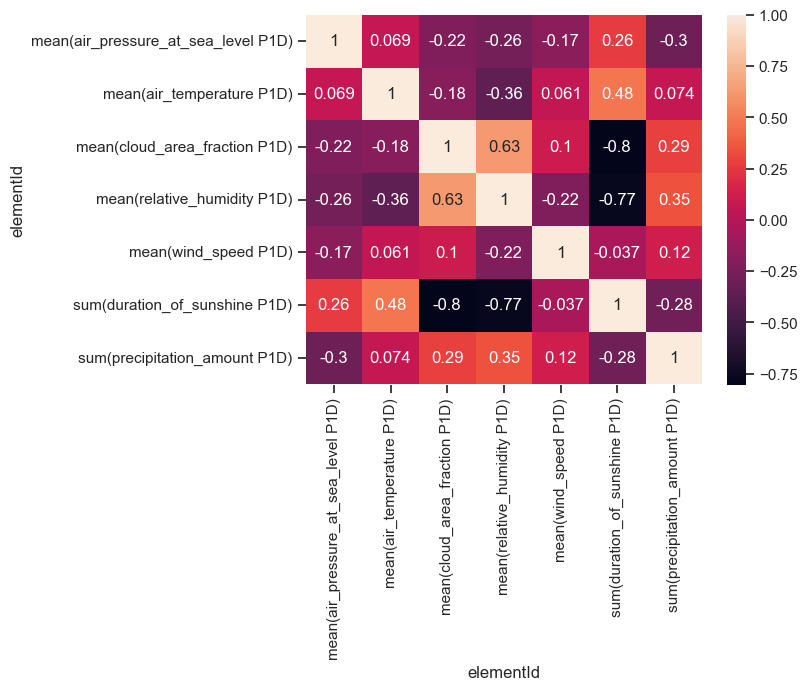

Found dataframe.csv, retrieved 12/13/22 22:07
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


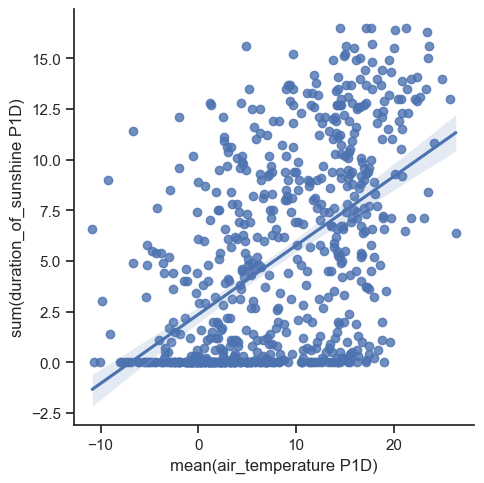

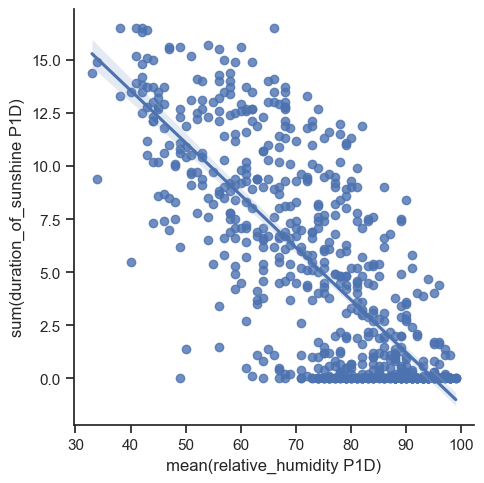

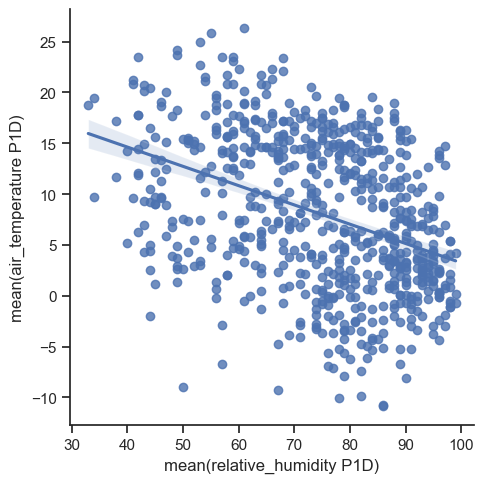

In [71]:
df = Api.getData(reftime=reftime, n_lines=1)
df = DataHandler.fixTable(df)

corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

df = Api.getData(reftime=reftime, n_lines=4)
df = DataHandler.fixTable(df)

sns.set_style(style='ticks')
sns.lmplot(data=df, y='sum(duration_of_sunshine P1D)', x='mean(air_temperature P1D)')
sns.lmplot(data=df, y='sum(duration_of_sunshine P1D)', x='mean(relative_humidity P1D)')
sns.lmplot(data=df, y='mean(air_temperature P1D)', x='mean(relative_humidity P1D)')